## Car Price Prediction
###  Road Map
- 1. Task
- 2. Data
- 3. Modelling
- 4. Error Measurement
- 5. Training and optimization
- 6. Performance Measurement
- 7. Validation and Testing
- 8. Corrective Measure

### Task
- predict the price of task oon the basis of given features

In [20]:
## loading datset and importing a libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Normalization, Dense

In [2]:
df=pd.read_csv("./dataset/train.csv")
df.head()

v.id  on road old  on road now  years      km  rating  condition  economy  \
0     1       535651       798186      3   78945       1          2       14   
1     2       591911       861056      6  117220       5          9        9   
2     3       686990       770762      2  132538       2          8       15   
3     4       573999       722381      4  101065       4          3       11   
4     5       691388       811335      6   61559       3          9       12   

   top speed  hp  torque  current price  
0        177  73     123       351318.0  
1        148  74      95       285001.5  
2        181  53      97       215386.0  
3        197  54     116       244295.5  
4        160  53     105       531114.5

In [3]:
df.shape

(1000, 12)

### Data Preparation 

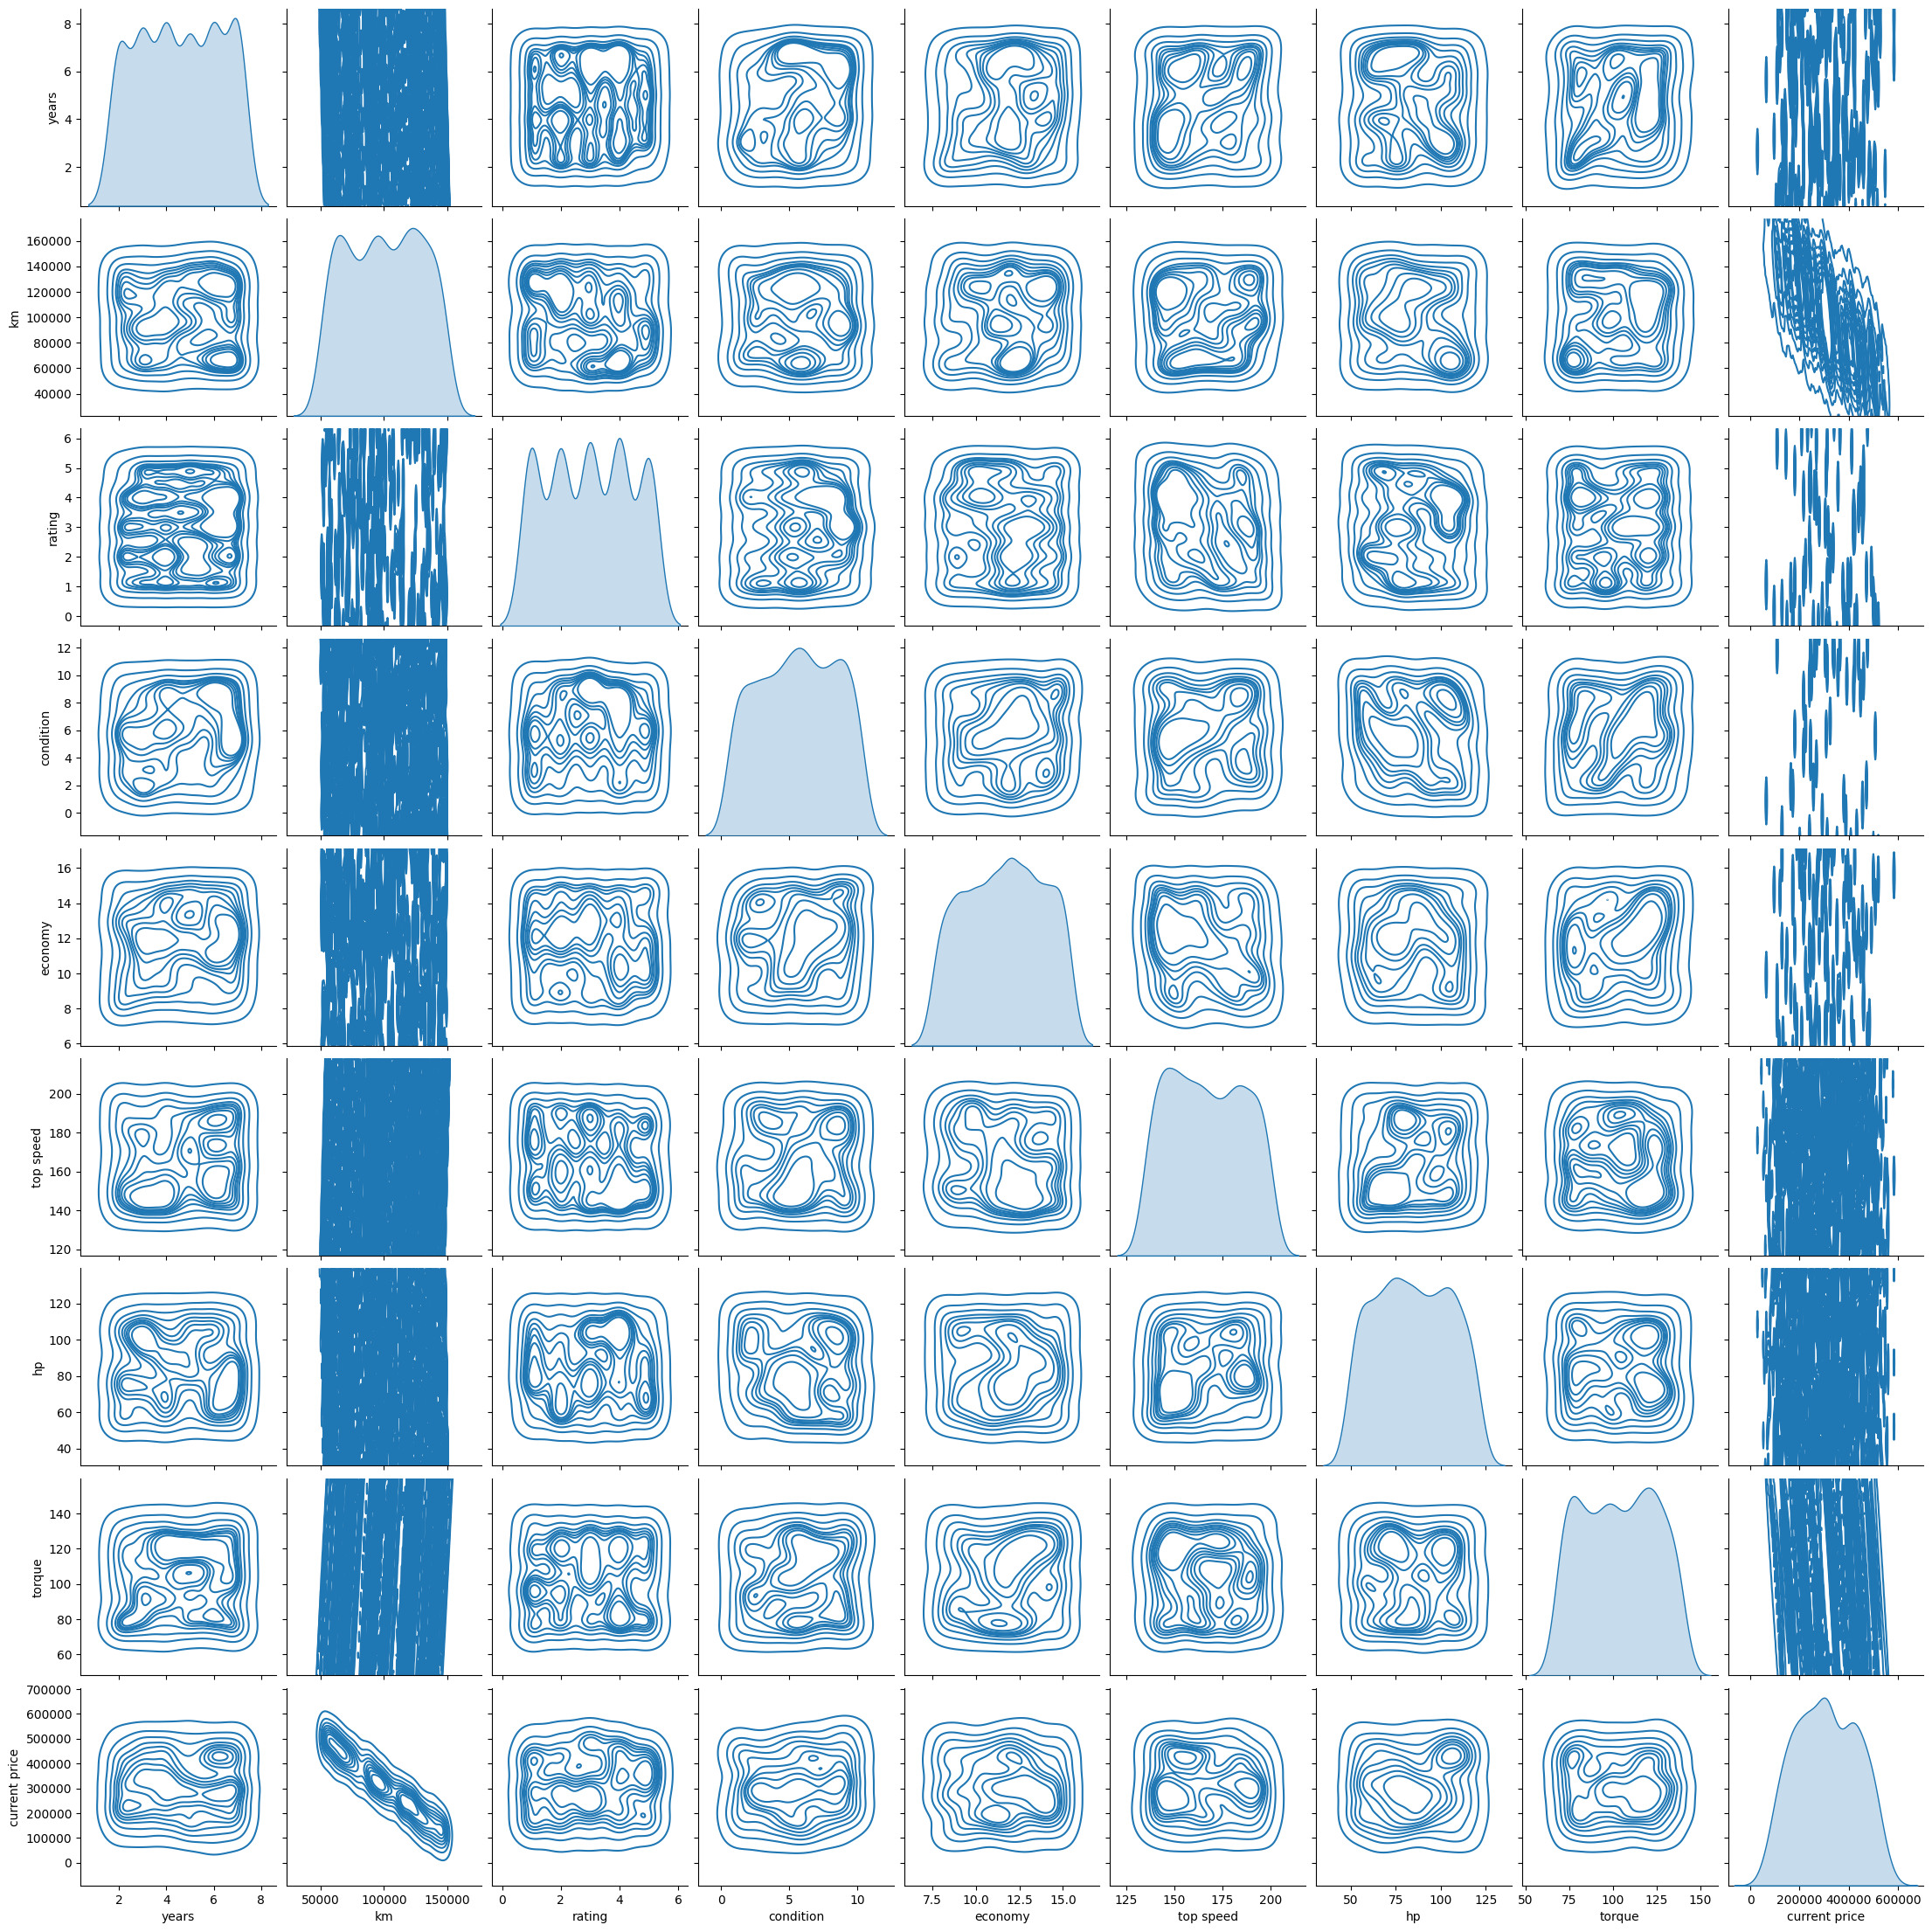

In [4]:
sns.pairplot(df[["years","km","rating","condition","economy","top speed","hp","torque","current price"]],kind='kde')

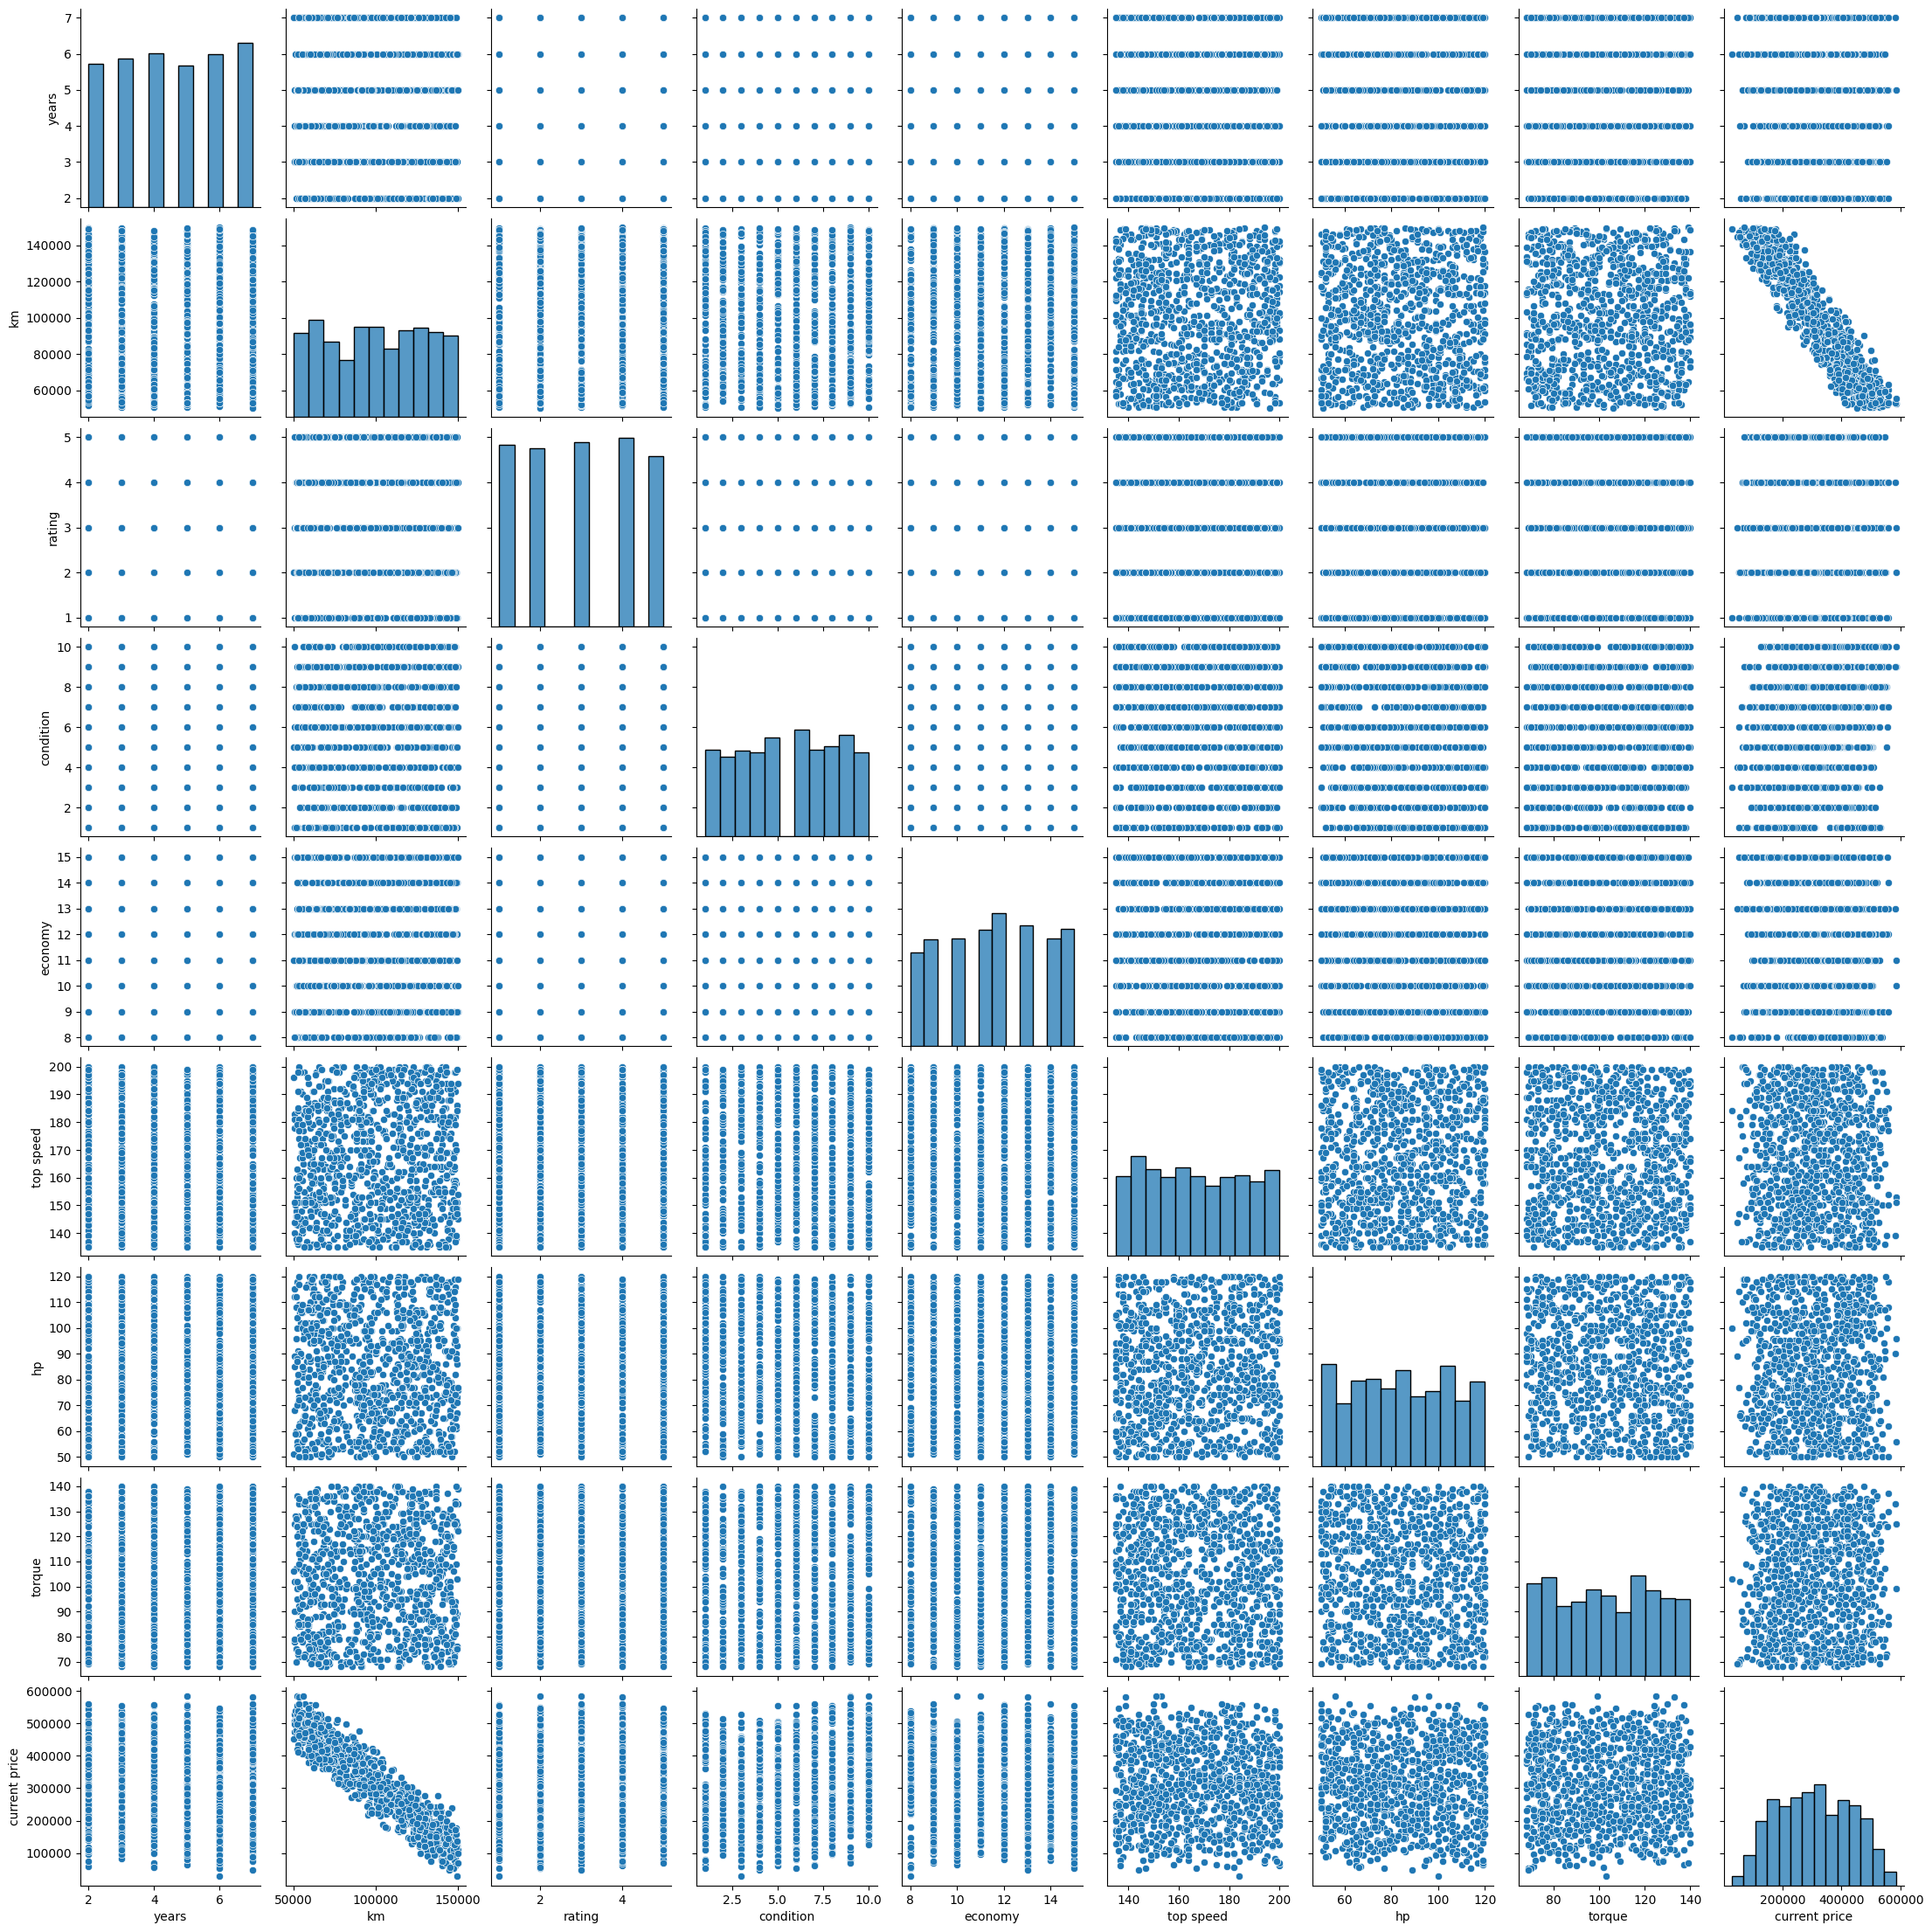

In [5]:
sns.pairplot(df[["years","km","rating","condition","economy","top speed","hp","torque","current price"]],kind='scatter')

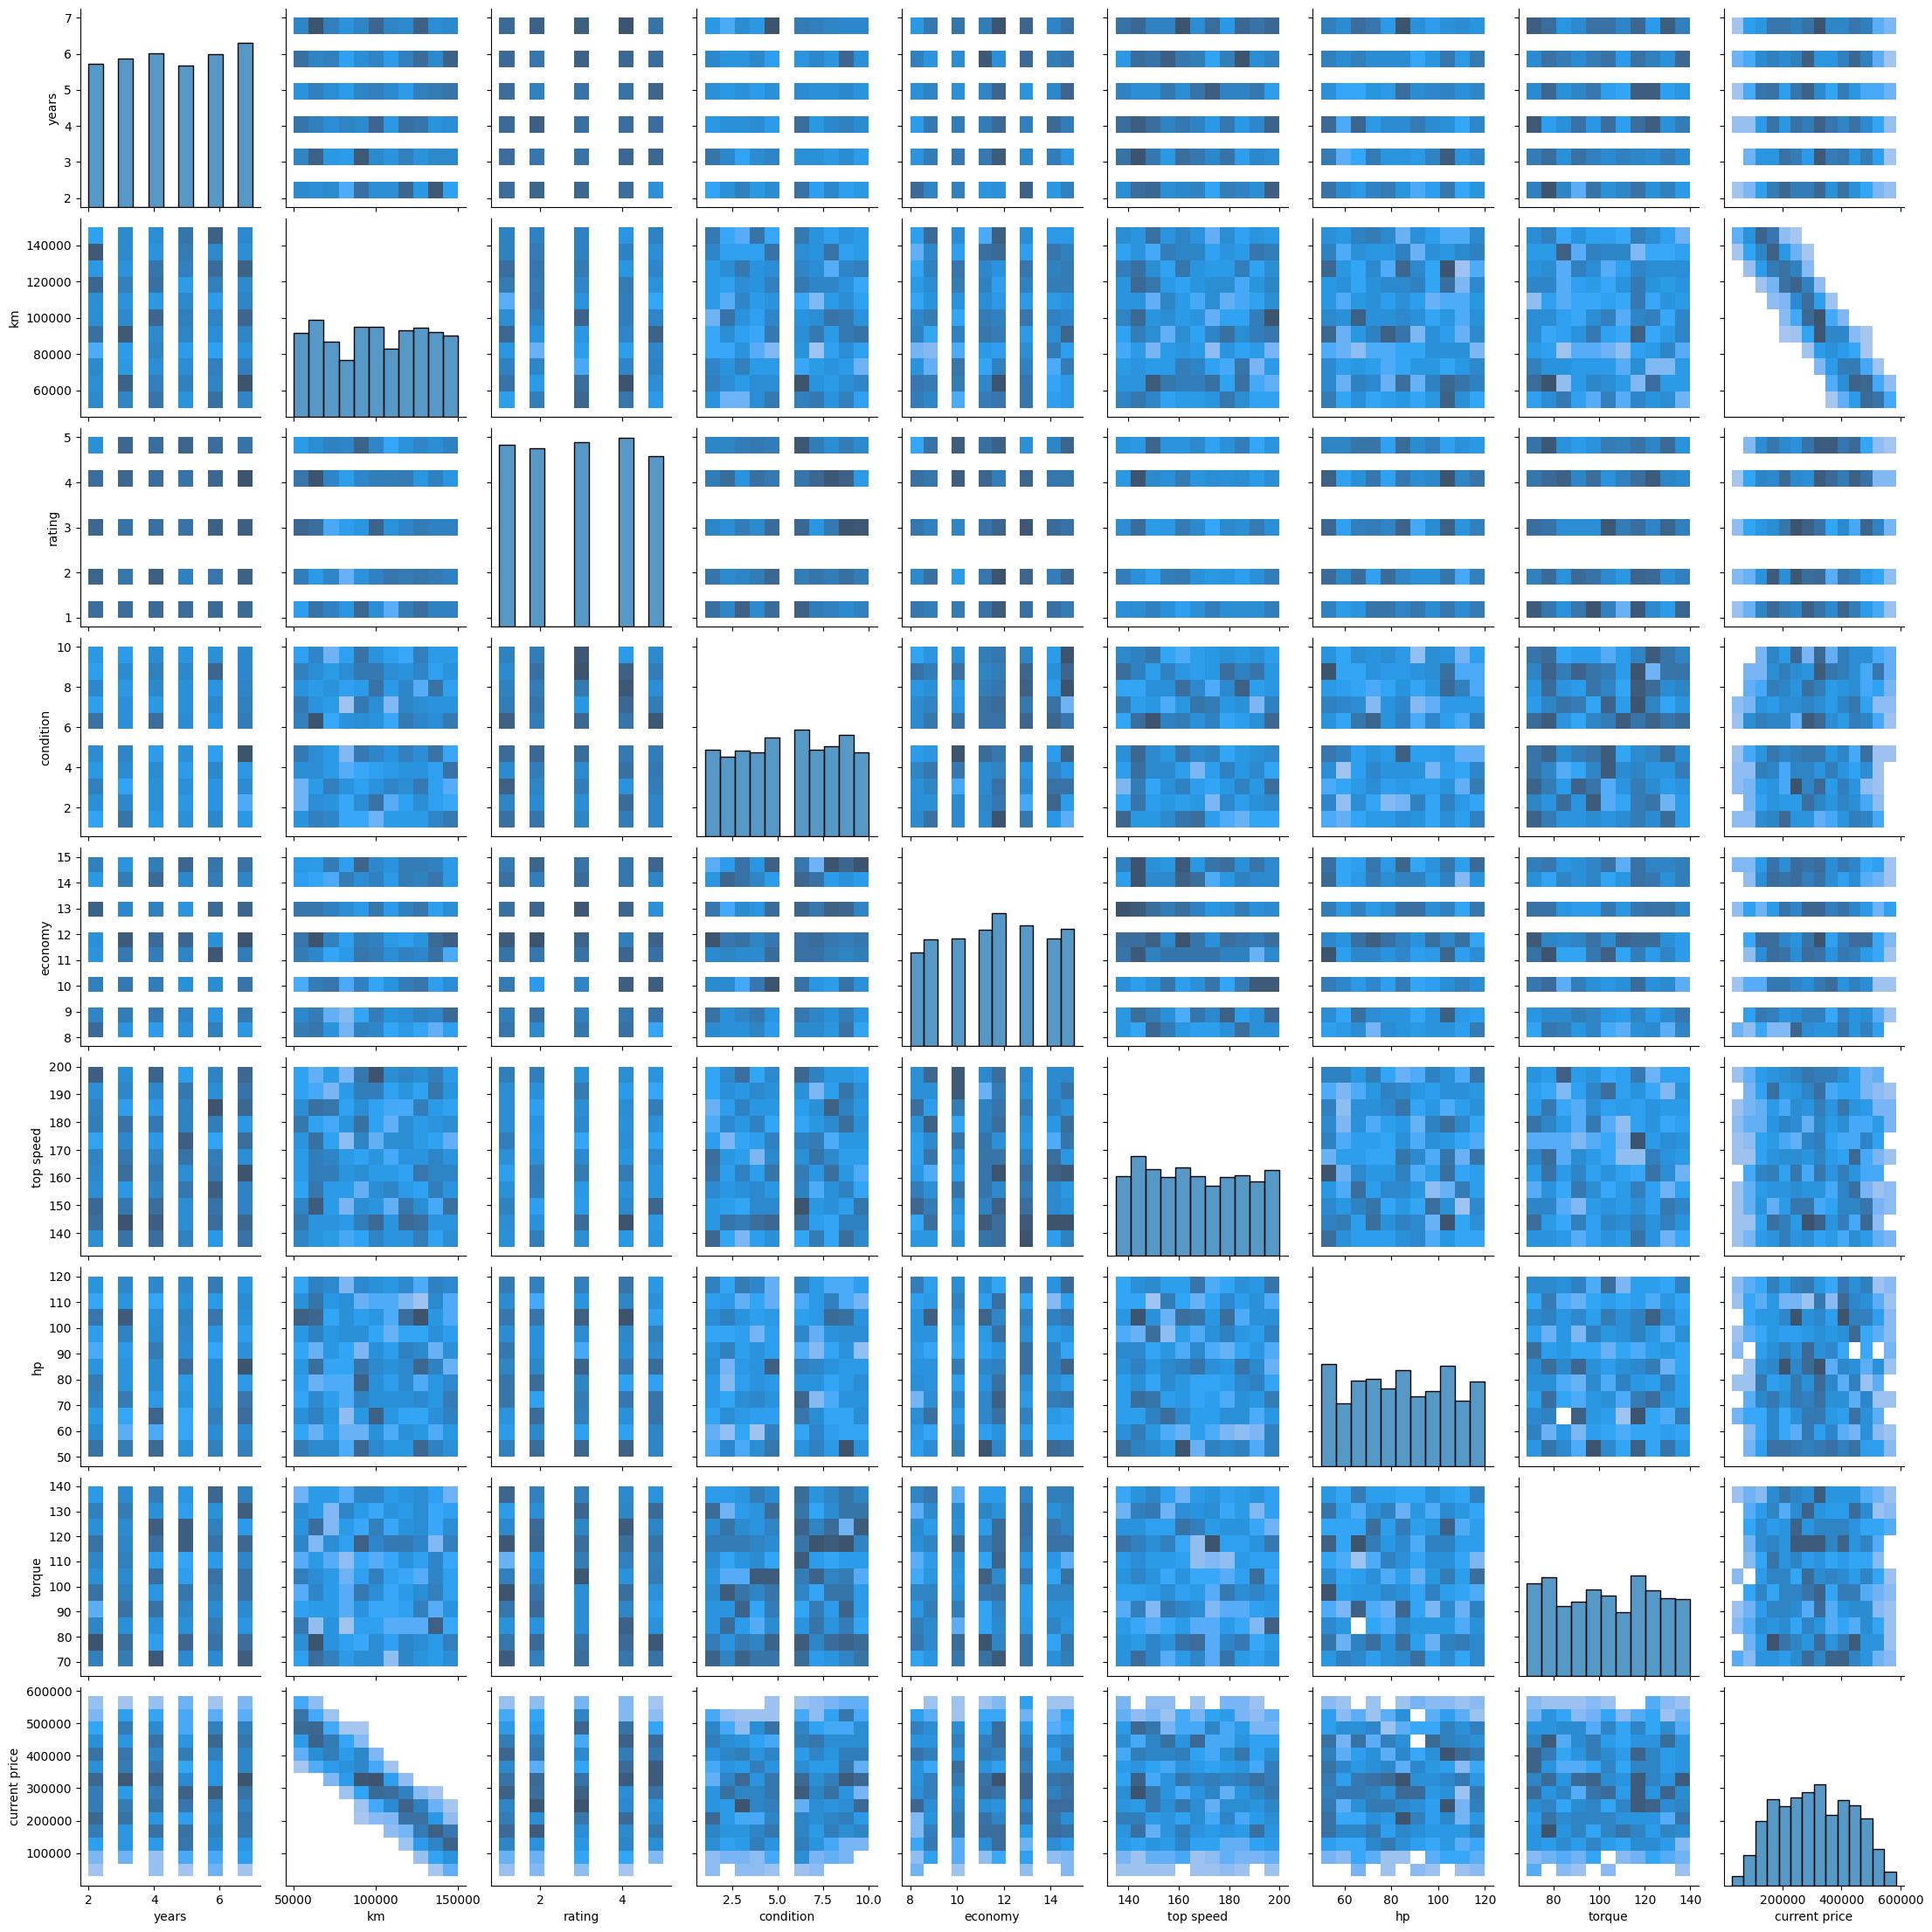

In [6]:
sns.pairplot(df[["years","km","rating","condition","economy","top speed","hp","torque","current price"]],kind='hist')

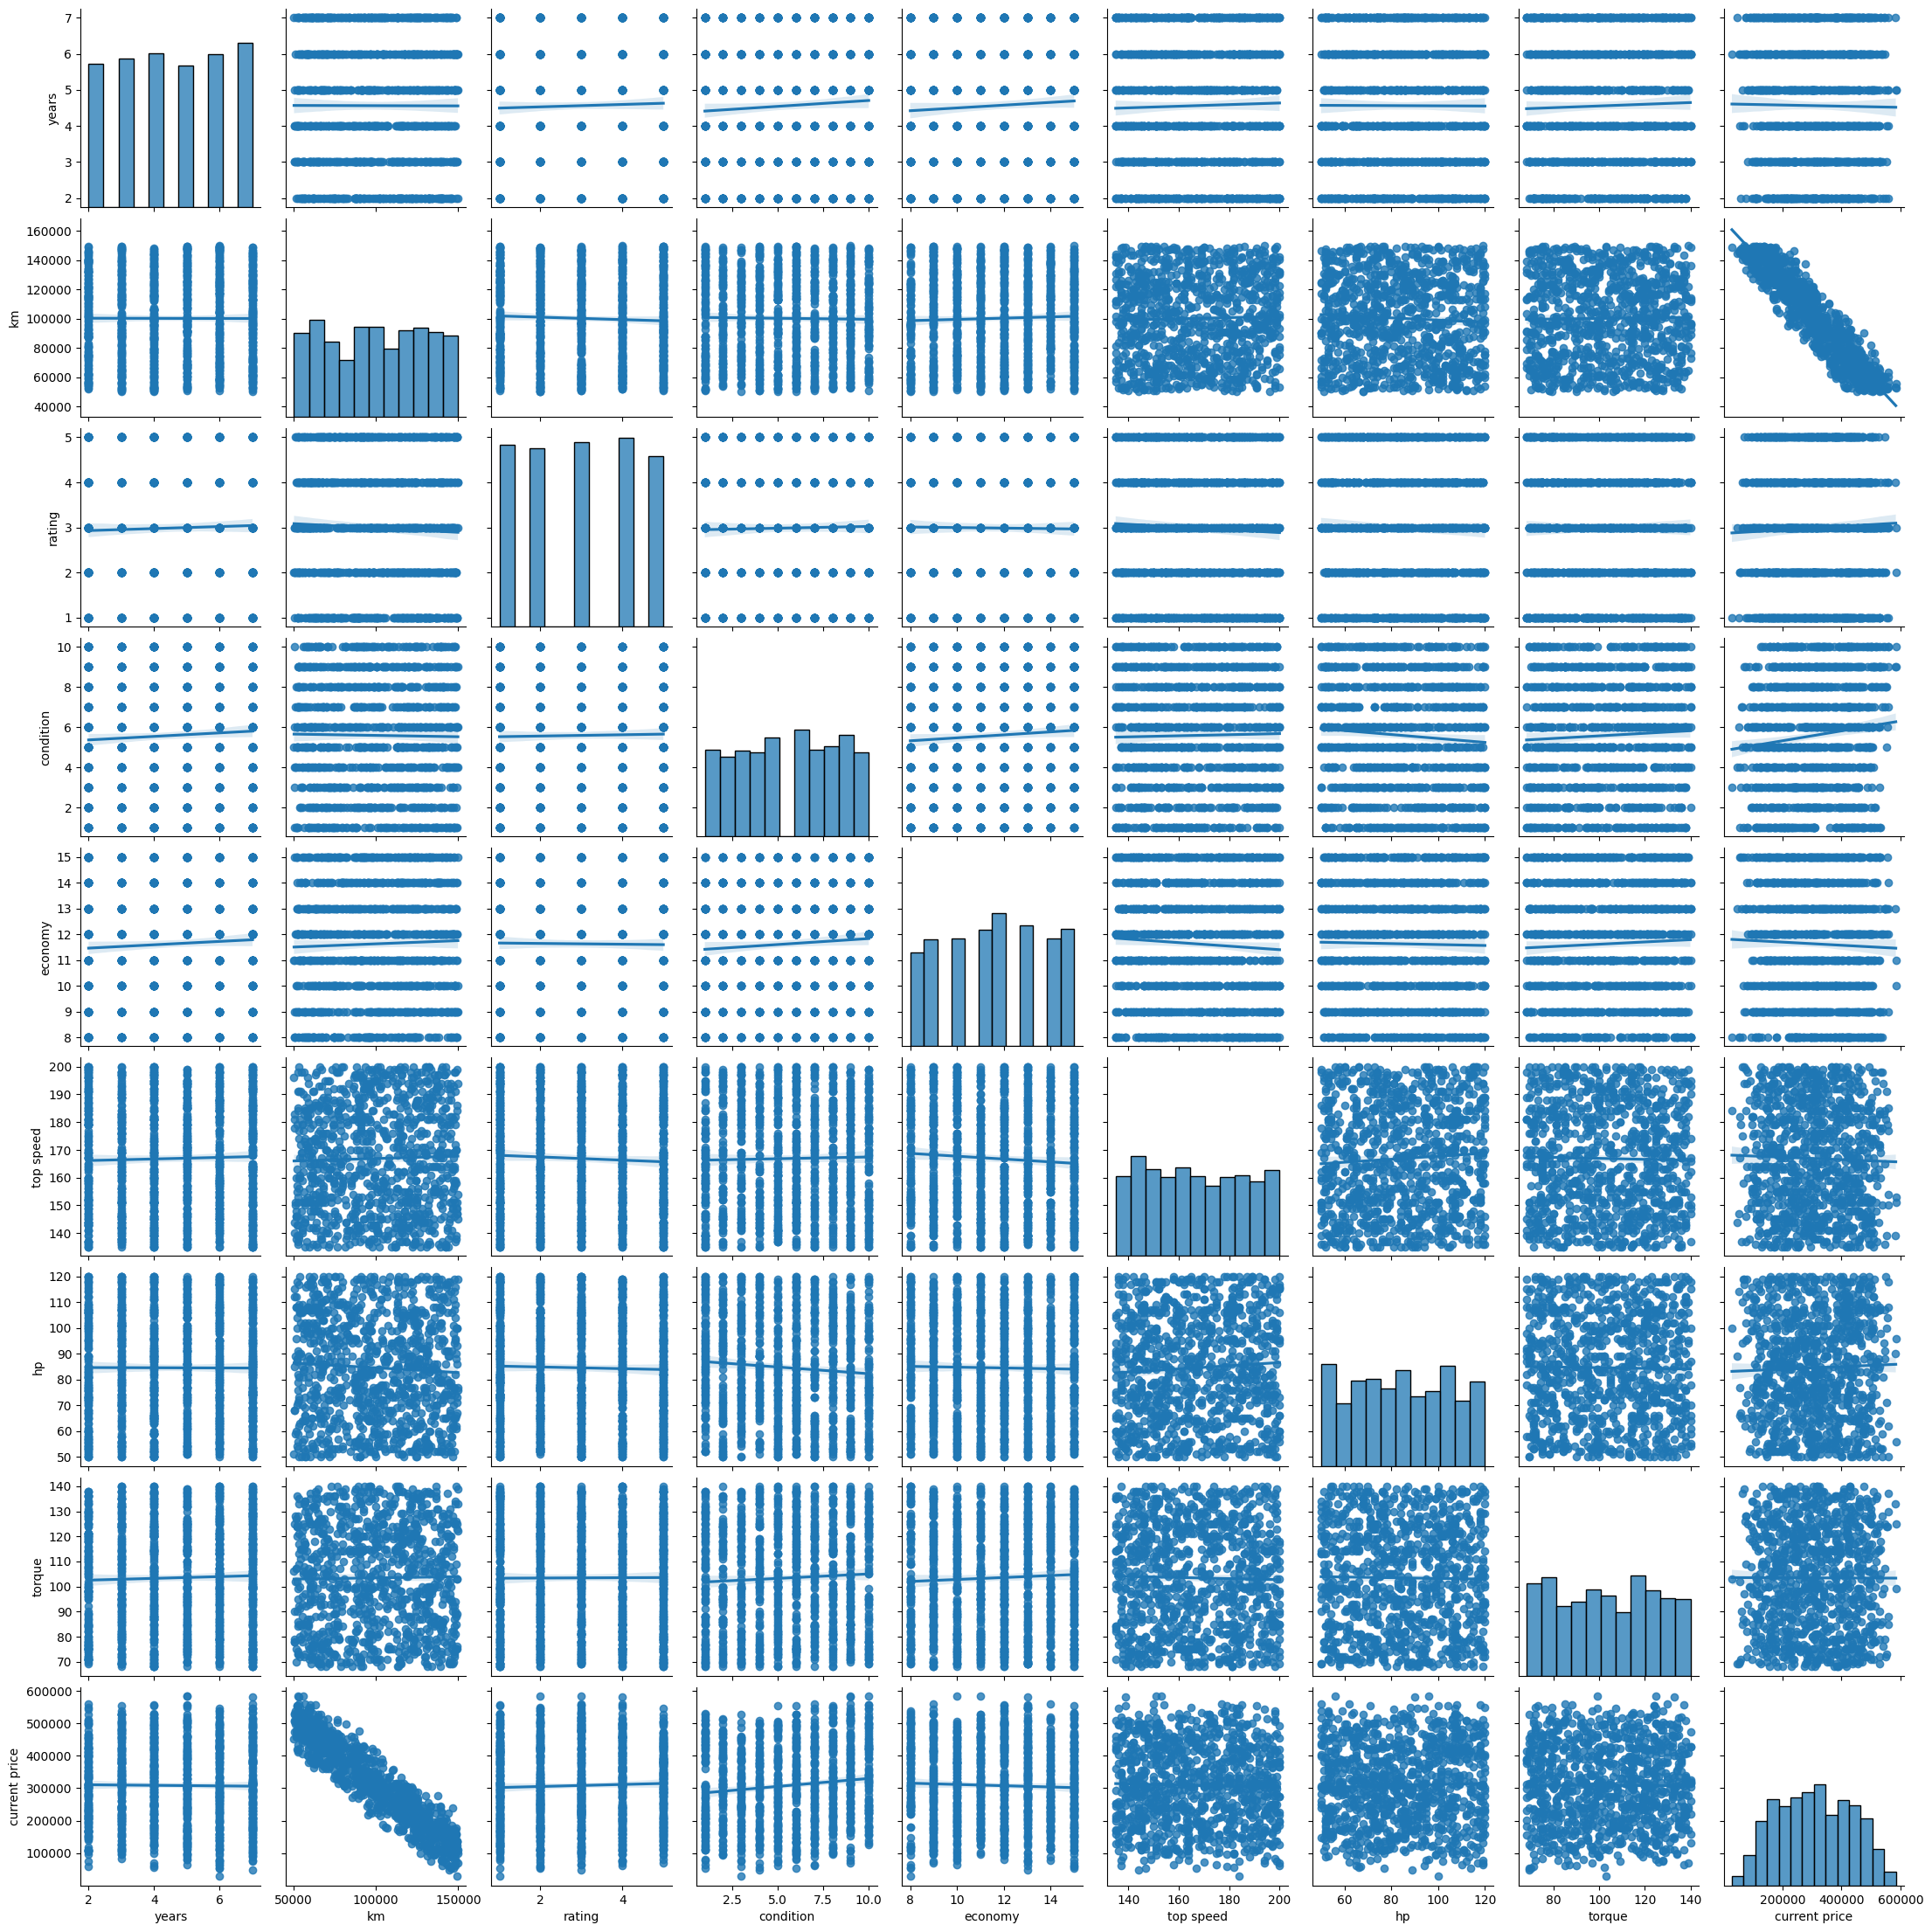

In [7]:
sns.pairplot(df[["years","km","rating","condition","economy","top speed","hp","torque","current price"]],kind='reg')

In [8]:
tensorData=tf.constant(df)
tensor_data=tf.cast(tensorData,dtype=tf.float32)
tensor_data

<tf.Tensor: shape=(1000, 12), dtype=float32, numpy=
array([[1.000000e+00, 5.356510e+05, 7.981860e+05, ..., 7.300000e+01,
        1.230000e+02, 3.513180e+05],
       [2.000000e+00, 5.919110e+05, 8.610560e+05, ..., 7.400000e+01,
        9.500000e+01, 2.850015e+05],
       [3.000000e+00, 6.869900e+05, 7.707620e+05, ..., 5.300000e+01,
        9.700000e+01, 2.153860e+05],
       ...,
       [9.980000e+02, 6.463440e+05, 8.427330e+05, ..., 1.130000e+02,
        8.900000e+01, 4.058710e+05],
       [9.990000e+02, 5.355590e+05, 7.324390e+05, ..., 1.120000e+02,
        1.280000e+02, 7.439800e+04],
       [1.000000e+03, 5.901050e+05, 7.797430e+05, ..., 9.900000e+01,
        9.600000e+01, 4.149385e+05]], dtype=float32)>

In [9]:
## Do shuffling to make sure there is no bias
tensor_data=tf.random.shuffle(tensor_data)
tensor_data[:5]

<tf.Tensor: shape=(5, 12), dtype=float32, numpy=
array([[5.010000e+02, 5.543820e+05, 7.658410e+05, 3.000000e+00,
        1.195390e+05, 4.000000e+00, 7.000000e+00, 9.000000e+00,
        1.420000e+02, 8.700000e+01, 1.040000e+02, 1.909565e+05],
       [6.310000e+02, 5.868330e+05, 8.420820e+05, 7.000000e+00,
        1.101220e+05, 3.000000e+00, 1.000000e+01, 9.000000e+00,
        1.950000e+02, 6.700000e+01, 1.320000e+02, 3.159250e+05],
       [7.370000e+02, 5.309510e+05, 7.410860e+05, 4.000000e+00,
        1.163180e+05, 3.000000e+00, 8.000000e+00, 1.500000e+01,
        1.710000e+02, 1.060000e+02, 1.180000e+02, 1.870500e+05],
       [2.430000e+02, 5.371090e+05, 8.833820e+05, 7.000000e+00,
        1.055030e+05, 3.000000e+00, 8.000000e+00, 9.000000e+00,
        1.770000e+02, 8.700000e+01, 1.150000e+02, 2.965655e+05],
       [4.100000e+02, 6.178870e+05, 7.903050e+05, 4.000000e+00,
        6.642700e+04, 1.000000e+00, 7.000000e+00, 9.000000e+00,
        1.580000e+02, 8.800000e+01, 8.800000e+01, 4

In [10]:
df.head(2)

v.id  on road old  on road now  years      km  rating  condition  economy  \
0     1       535651       798186      3   78945       1          2       14   
1     2       591911       861056      6  117220       5          9        9   

   top speed  hp  torque  current price  
0        177  73     123       351318.0  
1        148  74      95       285001.5

In [11]:
X=tensor_data[:,3:-1]
Y=tensor_data[:,-1]

In [12]:
print(X.shape)
print(Y.shape)

(1000, 8)
(1000,)


In [13]:
Y=tf.expand_dims(Y,axis=-1)

## Perform Normalization
The normalized data is then used to train the model. The normalization process is done using the following formula 
(x-meu)/variance      :-standard deviation^2 = variance

In [14]:
# sample example
normalizer=Normalization()
x_normalizer=tf.constant([2,3,4,5])
normalizer(x_normalizer)

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([2., 3., 4., 5.], dtype=float32)>

In [15]:
# sample example
normalizer = Normalization(mean=3, variance=2)
x_normalizer = tf.constant([2, 3, 4, 5])
normalizer(x_normalizer)

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([-0.70710677,  0.        ,  0.70710677,  1.4142135 ], dtype=float32)>

In [16]:
# sample example
normalizer = Normalization(axis=-1, mean=3, variance=2)
x_normalizer = tf.constant([[2, 3, 4, 5],[7,8,9,10]])
normalizer(x_normalizer)

<tf.Tensor: shape=(2, 4), dtype=float32, numpy=
array([[-0.70710677,  0.        ,  0.70710677,  1.4142135 ],
       [ 2.828427  ,  3.535534  ,  4.242641  ,  4.9497476 ]],
      dtype=float32)>

In [17]:
# Adapt normalizer to data without mean and variance it calculate for us
normalizer=Normalization()
normalizer.adapt(X) 

## Using Linear Regression Model

### Different ways to create model in tensorflow
- Sequential
- Functional
- Subclassing methods

In [22]:
model=tf.keras.Sequential([normalizer,
                           Dense(1)])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_3 (Normalization) │ (1000, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17 (72.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 17 (72.00 B)